In [43]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

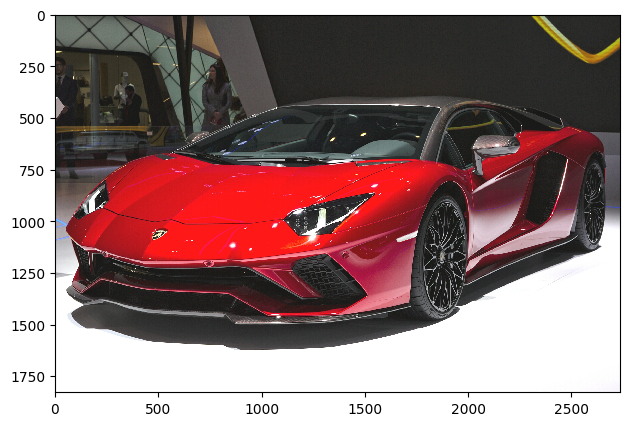

In [44]:
# read the image and show it
image = io.imread('https://www.sharpsightlabs.com/datasets/images/Lamborghini_Aventador_2018.jpg')
io.imshow(image)

I have tried two approaches to rescale the image to the smaller sizes:

1. Just cut each second row and column from the image
2. Add the value of the nearing pixels to each over and divide by 2

In the 2nd way there was changes in color, so the 1st variant is more preferrable

1st variant:

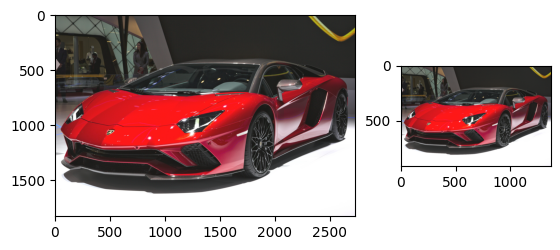

In [45]:
# take only every second row and column
resized_mini = image[::2, ::2, :]

# print the images
f, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
axes[0].imshow(image)
axes[1].imshow(resized_mini)

2nd variant (just to show that it is not efficient in this case):

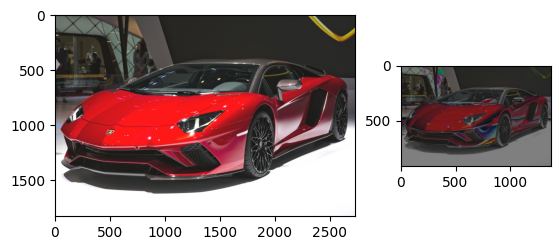

In [46]:
# downsampling the image by taking every other row and column and averaging the pixels values
resized_mini_1 = np.clip((image[::2] + image[1::2]) / 2, 0, 255).astype(np.uint8)
resized_mini_2 = np.clip((resized_mini_1[:, ::2] + resized_mini_1[:, 1::2]) / 2, 0, 255).astype(np.uint8)

# print the images
f, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
axes[0].imshow(image)
axes[1].imshow(resized_mini_2)

Now we will upscale the image and here also two ways to do it:

1. Just double each row and column
2. Calculate the average between nearest pixels and insert it

In the 2nd way there was changes in color, so the 1st variant is more preferrable

1st variant:

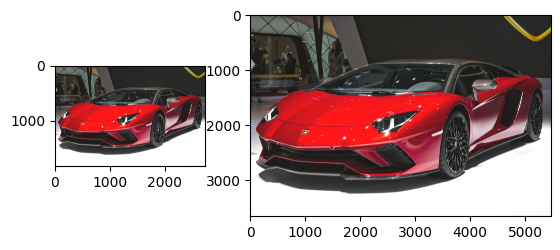

In [47]:
# initialize the array
resized_max = np.zeros((image.shape[0] * 2, image.shape[1] * 2, 3), dtype=np.uint8)

# duplicate the pixels to the nearest positions
for row in range(image.shape[0]):
  for column in range(image.shape[1]):
    resized_max[row*2, column*2] = image[row, column]
    resized_max[row*2 + 1, column*2] = image[row, column]
    resized_max[row*2, column*2 + 1] = image[row, column]
    resized_max[row*2 + 1, column*2 + 1] = image[row, column]

# print the images
f, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
axes[0].imshow(image)
axes[1].imshow(resized_max)

2nd variant (just to show that it is not efficient in this case):

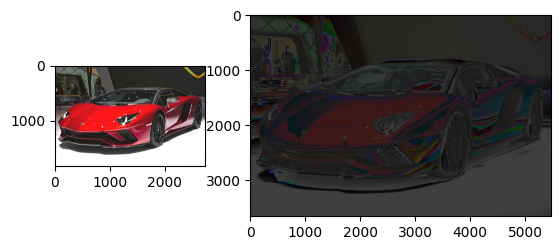

In [48]:
# initialize the array
resized_max = np.zeros((image.shape[0] * 2, image.shape[1] * 2, 3), dtype=np.uint8)

# upscale the image by calculating the average value of adjacent pixels
for row in range(image.shape[0] * 2):
  for column in range(image.shape[1] * 2):
    resized_max[row, column] = (image[row // 2, column // 2] + image[row // 2 - 1, column // 2] + image[row // 2, column // 2 - 1] + image[row // 2 - 1, column // 2 - 1]) // 4

# print the images
f, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
axes[0].imshow(image)
axes[1].imshow(resized_max)